In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#Data Preparation
# Load the dataset
df = pd.read_csv("large_movies_data_with_details.csv")
df.head()

# Create binary classification target
df['success'] = (df['revenue'] > 100_000_000).astype(int)

In [63]:
# Cleaning: Select only numeric features relevant for prediction
# Drop rows with missing values in selected columns to avoid errors in training
features = ['budget', 'popularity', 'vote_average', 'vote_count', 'runtime']
df_model = df[features + ['success']].dropna()

print("Step 1 Completed: Data prepared and cleaned.")
print(f"Final dataset shape: {df_model.shape}")
print(df_model['success'].value_counts())

Step 1 Completed: Data prepared and cleaned.
Final dataset shape: (1100, 6)
success
0    690
1    410
Name: count, dtype: int64


In [64]:
# Train/Test Split
X = df_model[features]
y = df_model['success']

# Stratified split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nStep 2 Completed: Train/test sets created (disjoint).")
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print("Train class ratio:\n", y_train.value_counts(normalize=True))
print("Test class ratio:\n", y_test.value_counts(normalize=True))



Step 2 Completed: Train/test sets created (disjoint).
Train size: (880, 5), Test size: (220, 5)
Train class ratio:
 success
0    0.627273
1    0.372727
Name: proportion, dtype: float64
Test class ratio:
 success
0    0.627273
1    0.372727
Name: proportion, dtype: float64


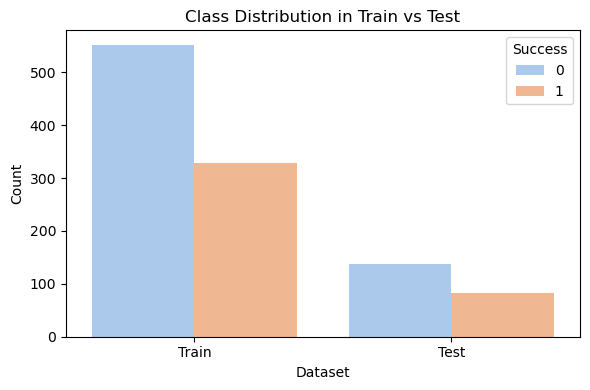

In [65]:
# Visualize train vs test class balance
train_set = X_train.copy()
train_set["Set"] = "Train"
train_set["success"] = y_train

test_set = X_test.copy()
test_set["Set"] = "Test"
test_set["success"] = y_test

combined = pd.concat([train_set, test_set])

plt.figure(figsize=(6, 4))
sns.countplot(data=combined, x="Set", hue="success", palette="pastel")
plt.title("Class Distribution in Train vs Test")
plt.xlabel("Dataset")
plt.ylabel("Count")
plt.legend(title="Success")
plt.tight_layout()
plt.show()

In [66]:
# Show sample rows from both sets
print("\n Sample Training Set:")
print(train_set.head())

print("\n Sample Testing Set:")
print(test_set.head())


 Sample Training Set:
        budget  popularity  vote_average  vote_count  runtime    Set  success
81     3000000       3.827         6.013        4327       90  Train        0
923  200000000       3.889         7.300        9395      126  Train        1
384    5402000       3.829         4.959         489      100  Train        0
325   75000000       4.405         7.112        8030      107  Train        1
585          0       3.575         6.800        1250      109  Train        0

 Sample Testing Set:
        budget  popularity  vote_average  vote_count  runtime   Set  success
481          0       3.574         7.369        1222      113  Test        0
79           0       3.828         5.942         420       96  Test        0
924   85000000       3.889         7.500        3512      159  Test        1
376  110000000       3.830         6.100        6674      120  Test        1
717   10000000       4.375         7.424        3319      113  Test        0


In [67]:
# No Additional Cleaning
print("\nStep 3 Completed: No additional cleaning needed. Data is numeric and clean.")


Step 3 Completed: No additional cleaning needed. Data is numeric and clean.


In [68]:
# Function to evaluate and visualize any tree
def evaluate_tree(clf, X_test, y_test, title, max_depth=None, color='Blues'):
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plot decision tree
    plt.figure(figsize=(14, 6))
    plot_tree(clf, feature_names=features, class_names=['Fail', 'Success'], filled=True, max_depth=max_depth)
    plt.title(f"{title}")
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=['Fail', 'Success'], yticklabels=['Fail', 'Success'])
    plt.title(f'{title} - Confusion Matrix (Accuracy: {acc:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    print(f" {title} Accuracy: {acc:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")
    return acc, cm

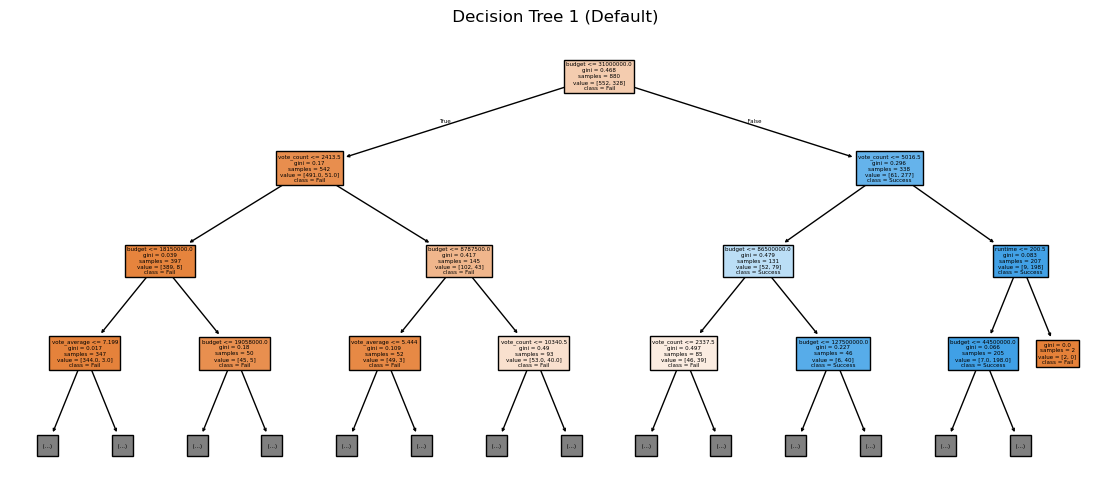

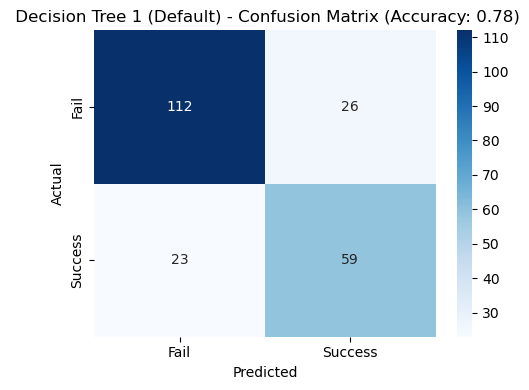

  Decision Tree 1 (Default) Accuracy: 0.78
Confusion Matrix:
[[112  26]
 [ 23  59]]

 Tree 1 training and testing completed.



In [69]:
# tree 1
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)

acc1, cm1 = evaluate_tree(clf1, X_test, y_test, " Decision Tree 1 (Default)", max_depth=3)
print(" Tree 1 training and testing completed.\n")

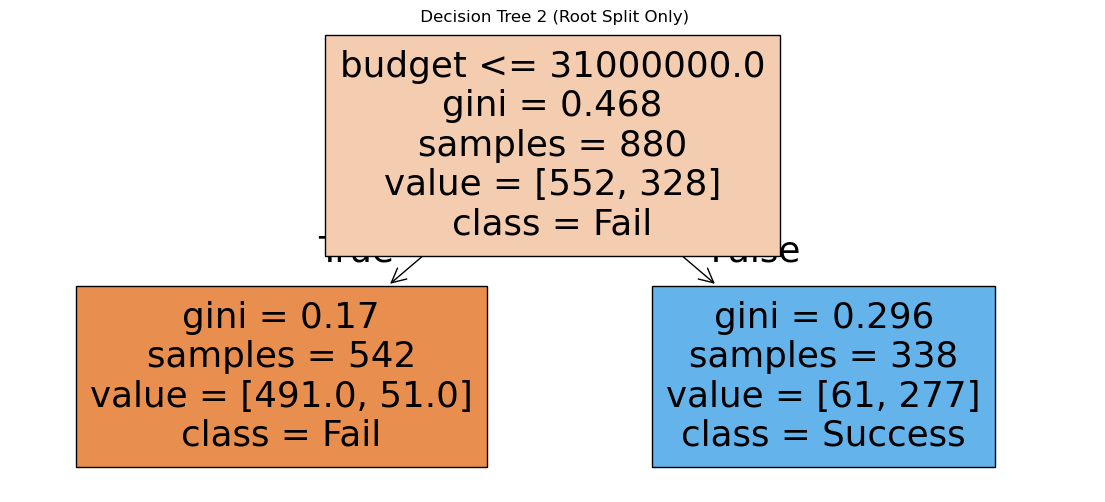

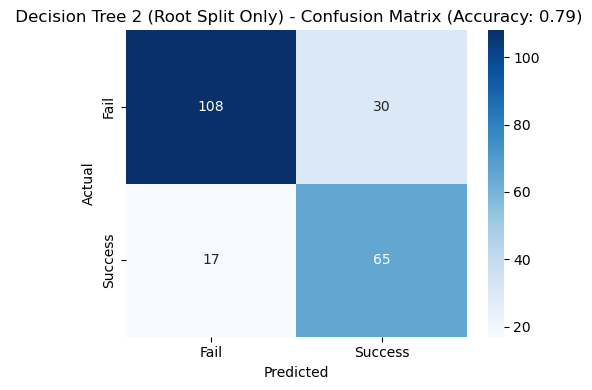

  Decision Tree 2 (Root Split Only) Accuracy: 0.79
Confusion Matrix:
[[108  30]
 [ 17  65]]

 Tree 2 training and testing completed.



In [70]:
# tree 2
clf2 = DecisionTreeClassifier(max_depth=1, random_state=42)
clf2.fit(X_train, y_train)

acc2, cm2 = evaluate_tree(clf2, X_test, y_test, " Decision Tree 2 (Root Split Only)", max_depth=1)
print(" Tree 2 training and testing completed.\n")


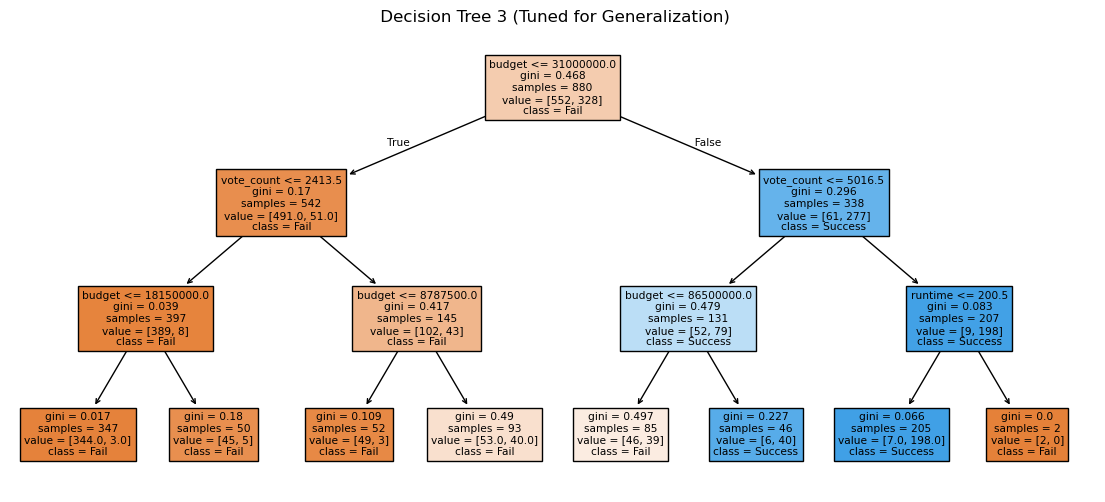

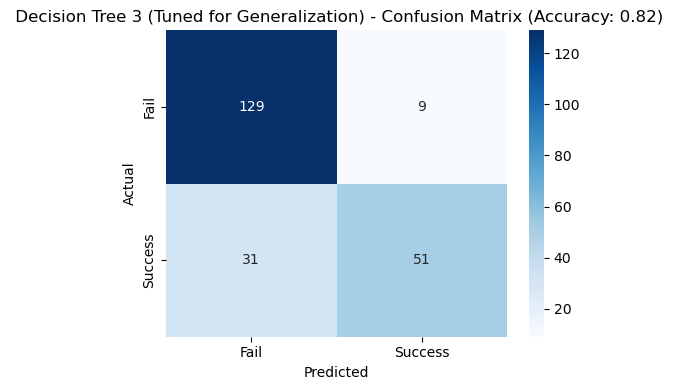

  Decision Tree 3 (Tuned for Generalization) Accuracy: 0.82
Confusion Matrix:
[[129   9]
 [ 31  51]]

 Tree 3 training and testing completed.



In [71]:
# tree 3
clf3 = DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42)
clf3.fit(X_train, y_train)

acc3, cm3 = evaluate_tree(clf3, X_test, y_test, " Decision Tree 3 (Tuned for Generalization)", max_depth=3)
print(" Tree 3 training and testing completed.\n")


In [72]:
# summary
print(" Summary of Accuracy for All Trees:")
print(f"Tree 1 (Default):              {acc1:.2f}")
print(f"Tree 2 (Root Only):            {acc2:.2f}")
print(f"Tree 3 (Generalized, Tuned):   {acc3:.2f}")

 Summary of Accuracy for All Trees:
Tree 1 (Default):              0.78
Tree 2 (Root Only):            0.79
Tree 3 (Generalized, Tuned):   0.82
